In [1]:
import numpy as np
import pandas as pd

In [2]:
col_name = ['user_id','item_id','rating','timestamp']

In [3]:
df = pd.read_csv('u.data',sep= '\t',names=col_name)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
 df.shape

(100003, 4)

In [6]:
movie = pd.read_csv('Movie_Id_Titles')

In [7]:
movie.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [8]:
print(len(movie['title'].unique()))
movie.shape

1664


(1682, 2)

In [9]:
df = pd.merge(df,movie,on= 'item_id')

In [10]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# EDA

In [11]:
df[df['rating']==5]['title'].unique()

array(['Star Wars (1977)', 'Empire Strikes Back, The (1980)',
       'Gone with the Wind (1939)', ...,
       'Marlene Dietrich: Shadow and Light (1996) ',
       'My Favorite Season (1993)', 'Everest (1998)'], dtype=object)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sb

In [13]:
sb.set_style('whitegrid')

In [14]:
%matplotlib inline

In [17]:
# Top 5 highest rated movies
df.groupby('title')['rating'].mean().sort_values(ascending = False).head() 

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [18]:
# Top 5 movies with the most no of ratings
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [20]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [21]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [24]:
ratings['no of ratings'] = df.groupby('title')['rating'].count()

In [25]:
ratings.head()

,rating,no of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


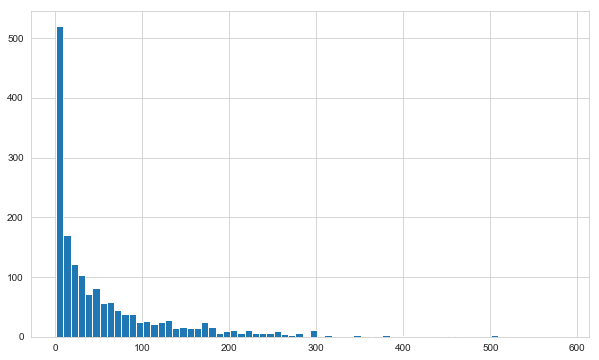

In [26]:
plt.figure(figsize=(10,6))
ratings['no of ratings'].hist(bins = 70) 

##### Most number of movies have nearly 20-40 no of ratings

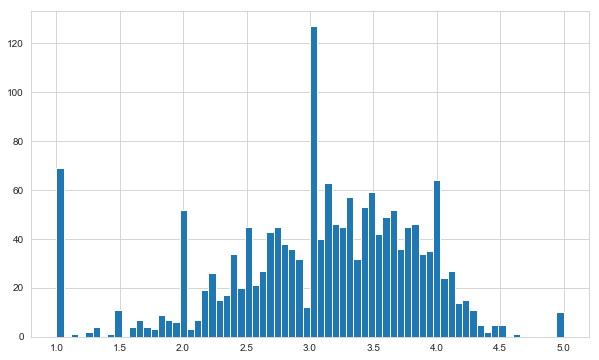

In [27]:
plt.figure(figsize=(10,6))
ratings['rating'].hist(bins=70) 

##### Most of the movies have ratings in whole number and 3 is average rating of the most movies

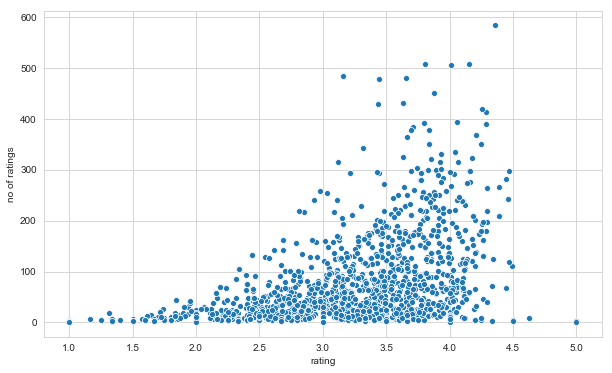

In [28]:
plt.figure(figsize=(10,6))
sb.scatterplot(ratings.rating,ratings['no of ratings']) 

#### Higher the rating more the no of ratings which means more number of people have watched the movie

<Figure size 720x432 with 0 Axes>

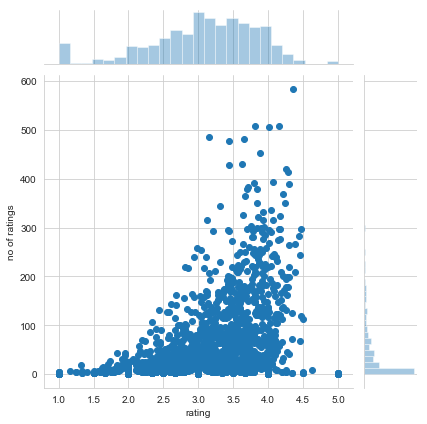

In [29]:
plt.figure(figsize=(10,6))
sb.jointplot(ratings.rating,ratings['no of ratings'])

# Recommender system

In [32]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [38]:
movie_matrix = df.pivot_table(values='rating',index='user_id',columns='title')     

In [39]:
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
ratings['no of ratings'].sort_values(ascending=False).head(2)

title
Star Wars (1977)    584
Contact (1997)      509
Name: no of ratings, dtype: int64

In [44]:
starwars_rating = movie_matrix['Star Wars (1977)']

In [43]:
Liar_Liar_rating = movie_matrix['Liar Liar (1997)']

In [45]:
movie_like_starwars = movie_matrix.corrwith(starwars_rating)

C:\Users\dell\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\dell\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


##### movie_like_starwars gives correlation of starwars movie with all the movies, higher the correlation more the similarity with Starwars movie

In [46]:
movie_like_liarliar = movie_matrix.corrwith(Liar_Liar_rating)

C:\Users\dell\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\dell\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [64]:
corr_starwars = pd.DataFrame(movie_like_starwars,columns=['correlation'])

In [65]:
corr_starwars.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [59]:
corr_starwars.dropna(inplace=True)
corr_starwars.sort_values('correlation',ascending=False).head()


,correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0


In [66]:
corr_starwars = corr_starwars.join(ratings['no of ratings'])

In [67]:
corr_starwars.head()

,correlation,no of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [70]:
corr_starwars = corr_starwars[corr_starwars['no of ratings']>100].sort_values('correlation',ascending = False)

In [71]:
corr_starwars.head()

,correlation,no of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


#### Now most of the movies like starwars have a no of ratings atleast 100 

In [74]:
#creat a dataframe for movies likr Liar Liar
corr_liarliar = pd.DataFrame(movie_like_liarliar,columns=['correlation'])

# drop null values
corr_liarliar.dropna(inplace=True)
#sort them based on descending order of their correlation values
corr_liarliar.sort_values('correlation',ascending=False).head()

#filter the movies with no of ratings less then 100
corr_liarliar = corr_liarliar.join(ratings['no of ratings'])
corr_liarliar = corr_liarliar[corr_liarliar['no of ratings']>100].sort_values('correlation',ascending = False)

corr_liarliar.head()

,correlation,no of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


## Conclusion: Ultimately movies are correlated based on no of ratings a